# Activity: Trying out your own RFM Analysis

Replicate the RFM analysis steps, but only for hours 12PM-5PM.

Kindly fill the code cells with python lines to accomplish the tasks. You may refer to the lecture notebook.

In [114]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# This code imports a library "os" that allows file navigation
import os
# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/my_workspace')

## Prepare data

Read csv

In [117]:
df = pd.read_csv("Data/cc_clean.csv")
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.870000e+15,M,San Fernando,121812,NaN,18/07/1964,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59


*Trick*: Pandas has its own methods for dates. We just need to convert it using `pd.to_datetime`.

In [118]:
df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.870000e+15,M,San Fernando,121812,NaN,18/07/1964,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59


For recency analysis, we need to know how much days have passed since the transaction, assuming current date is Jan 1, 2022.

In [119]:
# Define the current date
current_date = pd.to_datetime('2022-01-01')

# Calculate the elapsed days
df['elapsed_days'] = (current_date - df['trans_datetime']).dt.days

df.head()


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642
3,4.870000e+15,M,San Fernando,121812,NaN,18/07/1964,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459


In [120]:
# Change age dtype to date time
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')

#Add the age column
df['age'] = (current_date - df['dob']).dt.days // 365.25
df['age'] = df['age'].astype('int')
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68
3,4.870000e+15,M,San Fernando,121812,NaN,1964-07-18,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322,57
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67


In [121]:
# Add time of day

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['trans_datetime'].dt.hour.apply(get_time_of_day)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,afternoon
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,afternoon
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,afternoon
3,4.870000e+15,M,San Fernando,121812,NaN,1964-07-18,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322,57,evening
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,afternoon


In [122]:
# Add season
df['season'] = df['trans_datetime'].dt.month
df['season'] = df['season'].map(lambda x: "Cool" if x in[12, 1, 2] else
                                                    "Rainy" if x in [5, 6, 7, 8, 9, 10] else
                                                    "Dry")
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,afternoon,Cool
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,afternoon,Rainy
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,afternoon,Dry
3,4.870000e+15,M,San Fernando,121812,NaN,1964-07-18,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322,57,evening,Cool
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,afternoon,Rainy


# Use Age as segment


In [123]:
# Check value count for age
df['age'].value_counts()

age
72    11295
55     6375
61     6368
51     6355
64     5647
66     4261
78     4235
63     3583
60     3560
53     3550
57     3541
79     3535
58     2877
67     2832
91     2824
73     2139
68     2139
76     2137
74     2127
59     2121
80     2118
65     2106
56     1442
83     1432
54     1425
62     1424
70     1423
69     1418
71     1417
87     1415
52      730
95      723
86      710
92      709
93        7
Name: count, dtype: int64

In [124]:
def age_segment(age):
    if 50 <= age <= 59:
        return 'Middle-aged Adults'
    elif 60 <= age <= 69:
        return 'Pre-Retirees'
    elif 70 <= age <= 79:
        return 'Young Seniors'
    else:
        return 'Older Seniors'

df['age_segment'] = df['age'].apply(age_segment)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season,age_segment
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,690,63,afternoon,Cool,Pre-Retirees
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,579,51,afternoon,Rainy,Middle-aged Adults
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,642,68,afternoon,Dry,Pre-Retirees
3,4.870000e+15,M,San Fernando,121812,NaN,1964-07-18,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322,57,evening,Cool,Middle-aged Adults
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,459,67,afternoon,Rainy,Pre-Retirees


In [125]:
# Check values for age segment created
df['age_segment'].value_counts()

age_segment
Pre-Retirees          33338
Middle-aged Adults    28416
Young Seniors         28308
Older Seniors          9938
Name: count, dtype: int64

In [126]:
# check shape of df
df.shape

(100000, 18)

## RFM Example
Determine some spending characteristics of each customer in the past 12 months


First, create a per-customer table using transactions done in 2021

In [127]:
# Filter data to 2021
data_df = df[df['trans_datetime'].dt.year==2021]
data_df

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season,age_segment
3,4.870000e+15,M,San Fernando,121812,NaN,1964-07-18,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04,322,57,evening,Cool,Middle-aged Adults
7,1.800000e+14,M,Balanga,96061,Manufacturing systems engineer,1950-05-14,233000000000,233000000000,c371800cdd75b7373b0a883e9ea38450,1633018557,kids_pets,47.87,2021-10-01 00:15:57,91,71,evening,Rainy,Young Seniors
9,4.010000e+12,M,Malaybalay,174625,Tourist information centre manager,1966-01-11,439000000000,439000000000,2ecae6c920f6ae3e3cf3dd3abd225fda,1621672603,NaN,114.37,2021-05-22 16:36:43,223,55,afternoon,Rainy,Middle-aged Adults
10,3.470000e+14,M,Antipolo,776386,Seismic interpreter,1959-05-19,564000000000,564000000000,44fec72badccf385eec1f6bf27ccdf65,1612980825,personal_care,58.04,2021-02-11 02:13:45,323,62,evening,Cool,Pre-Retirees
14,1.800000e+14,M,Marikina City,450741,NaN,1955-08-12,34614744133,34614744133,3a86393194aa83069765af258572b4cb,1615174156,shopping_pos,127.83,2021-03-08 11:29:16,298,66,morning,Dry,Pre-Retirees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,6.550000e+15,M,Malaybalay,174625,English as a foreign language teacher,1948-12-31,581000000000,581000000000,40b006a3e501f90c47ae5730e7e17316,1617759699,grocery_pos,60.76,2021-04-07 09:41:39,268,73,morning,Dry,Young Seniors
99995,2.470000e+15,M,San Fernando,306659,"Surveyor, quantity",1935-11-01,581000000000,581000000000,d44f411eabd406a76a60546e723a98fd,1628185569,kids_pets,98.23,2021-08-06 01:46:09,147,86,evening,Rainy,Older Seniors
99996,3.520000e+15,M,Masbate,95389,Wellsite geologist,1967-11-20,531000000000,531000000000,7e767a74cae901c13f1a9d1d37aa63d4,1621481285,grocery_pos,78.79,2021-05-20 11:28:05,225,54,morning,Rainy,Middle-aged Adults
99997,4.620000e+15,M,San Fernando,121812,Personnel officer,1934-11-20,555000000000,555000000000,6ced184c93e66028e8d235ad3060de90,1625341374,personal_care,31.37,2021-07-04 03:42:54,180,87,evening,Rainy,Older Seniors


In [128]:
# check shape of data
df.shape

(100000, 18)

In [129]:
df.sort_values(by='elapsed_days')

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,elapsed_days,age,time_of_day,season,age_segment
5648,2.280000e+15,M,Olongapo,233040,Technical author,1956-12-25,854000000000,854000000000,af8324b56c7ddac6e6d8ef38ecfd2ac4,1638832501,home,103.13,2021-12-07 07:15:01,24,65,morning,Cool,Pre-Retirees
12492,3.800000e+13,M,City of Isabela,112788,Sport and exercise psychologist,1967-03-04,378000000000,378000000000,fd964e7b9138ec8adb529deff2d05834,1638824906,home,15.90,2021-12-07 05:08:26,24,54,morning,Cool,Middle-aged Adults
27091,4.140000e+18,M,Calapan,133893,NaN,1953-07-23,628000000000,628000000000,0dd129db9bad398b2cfef8db839d380a,1638823374,kids_pets,50.74,2021-12-07 04:42:54,24,68,evening,Cool,Pre-Retirees
1316,1.800000e+14,M,Calapan,133893,Tourist information centre manager,1949-12-05,124000000000,124000000000,4d417f17351af5b759acedac31eb0b36,1638820346,kids_pets,61.36,2021-12-07 03:52:26,24,72,evening,Cool,Young Seniors
14672,4.400000e+15,M,Dagupan City,171271,Camera operator,1949-04-24,753000000000,753000000000,43aee74ebd7b675d19a35558213b6c57,1638815211,home,62.78,2021-12-07 02:26:51,24,72,evening,Cool,Young Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31150,3.580000e+15,M,Santa Rosa,353767,"Clinical scientist, histocompatibility and imm...",1966-11-19,867000000000,867000000000,4b9ef81106225b24626d1aa75a3995d7,1577894269,travel,21.90,2020-01-01 23:57:49,730,55,evening,Cool,Middle-aged Adults
54193,6.550000e+15,M,Butuan,337063,Hotel manager,1947-01-06,790000000000,790000000000,bf4b7017630212097fa3f833a5415920,1577864129,gas_transport,71.38,2020-01-01 15:35:29,730,74,afternoon,Cool,Young Seniors
61384,4.430000e+15,M,General Santos,594446,Contracting civil engineer,1960-06-26,319000000000,319000000000,b9488d390eb6249f7b8df74cbdca8a00,1577861417,gas_transport,66.78,2020-01-01 14:50:17,730,61,afternoon,Cool,Pre-Retirees
22127,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,257000000000,27e642b4e73395c7b461a9d668289d67,1577841044,entertainment,1.01,2020-01-01 09:10:44,730,67,morning,Cool,Pre-Retirees


### Recency


In [130]:
# Get days since last transaction of each customer first, and include gender tag
# last transaction min of elapsed time
# groupby + trick to convert back to dataframe
rec_df = data_df.groupby(['season'])['elapsed_days'].min().to_frame(name='recency').reset_index()
rec_df

,season,recency
0,Cool,24
1,Dry,31
2,Rainy,61


Using this, create a system to assign a recency score to the `recency` column.

**More recent transaction => Higher score**

* 1 - low score
* 2 - medium score
* 3 - high score

In [131]:
def assign_score_recency(x):
  if x<=30: # last transaction is within last month
    return 3
  elif 30<x<90: # within last quarter
    return 2
  else: #older than last quarter
    return 1

In [132]:
rec_df['recency_score'] = rec_df['recency'].map(assign_score_recency)
rec_df

,season,recency,recency_score
0,Cool,24,3
1,Dry,31,2
2,Rainy,61,2


### Frequency
>Q: On average, how frequent did each customer  transact in the past year?

In [133]:
# Get transaction frequency of each customer first
# groupby + trick to convert back to dataframe
freq_df = data_df.groupby(['season']).size().to_frame(name='frequency').reset_index()
freq_df

,season,frequency
0,Cool,7727
1,Dry,11642
2,Rainy,27498


Using pandas method `pd.qcut` (quantile cut), classify and score the customers based on their frequency

**More frequent transactions => Higher score**

* 1- low score
* 2- medium score
* 3- high score

In [134]:
freq_df['frequency'].describe()

count        3.000000
mean     15622.333333
std      10469.259780
min       7727.000000
25%       9684.500000
50%      11642.000000
75%      19570.000000
max      27498.000000
Name: frequency, dtype: float64

In [135]:
freq_df['frequency_score'] = pd.qcut(freq_df['frequency'], q=3, labels=[1, 2, 3]).astype(int)
freq_df

,season,frequency,frequency_score
0,Cool,7727,1
1,Dry,11642,2
2,Rainy,27498,3


In [136]:
freq_df['frequency_score'].value_counts()

frequency_score
1    1
2    1
3    1
Name: count, dtype: int64

### Monetary value
>Q: On average, how much is the total spending of each customer per gender?

In [137]:
# Get total spending of each customer first
# groupby + trick to convert back to dataframe
mv_df = data_df.groupby(['season'])['amt'].sum().to_frame(name='total_amt').reset_index()
mv_df

,season,total_amt
0,Cool,548892.22
1,Dry,802834.45
2,Rainy,1991993.95


Using pandas method `pd.qcut` (quantile cut), classify and score the customers based on their monetary value

**Larger total transaction amts => Higher score**

* 1- low score
* 2- medium score
* 3- high score

In [138]:
mv_df['monetary_score'] = pd.qcut(mv_df['total_amt'], q=3, labels=[1, 2, 3]).astype(int)
mv_df

,season,total_amt,monetary_score
0,Cool,548892.22,1
1,Dry,802834.45,2
2,Rainy,1991993.95,3


### Total RFM score
To compute the total score, we need to


1.   Merge the recency, frequency, and monetary value tables together
2.   Add the scores to a column `rfm_score`



In [139]:
# First, merge rec_df and freq_df using pd.merge
rfm_df = pd.merge(rec_df, freq_df, on=['season'], how='inner')
rfm_df.head()

,season,recency,recency_score,frequency,frequency_score
0,Cool,24,3,7727,1
1,Dry,31,2,11642,2
2,Rainy,61,2,27498,3


In [140]:
# check lengths to see if we did merge correctly
print(len(rec_df))
print(len(freq_df))
print(len(rfm_df))

3
3
3


In [141]:
# Then merge `mv_df` to `rfm_df`
rfm_df = pd.merge(rfm_df, mv_df, on=['season'], how='inner')
rfm_df.head()

,season,recency,recency_score,frequency,frequency_score,total_amt,monetary_score
0,Cool,24,3,7727,1,548892.22,1
1,Dry,31,2,11642,2,802834.45,2
2,Rainy,61,2,27498,3,1991993.95,3


In [142]:
# check lengths to see if we did merge correctly
print(len(mv_df))
print(len(rfm_df))

3
3


In [143]:
# check lengths
print(len(rec_df))
print(len(freq_df))
print(len(rfm_df))
print(len(mv_df))
print(len(rfm_df))

3
3
3
3
3


Add up the scores and store in column `rfm_score`

In [144]:
rfm_df['rfm_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] +rfm_df['monetary_score']
rfm_df.head()

,season,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score
0,Cool,24,3,7727,1,548892.22,1,5
1,Dry,31,2,11642,2,802834.45,2,6
2,Rainy,61,2,27498,3,1991993.95,3,8


In [145]:
rfm_df['rfm_score'].value_counts()

rfm_score
5    1
6    1
8    1
Name: count, dtype: int64

Assign RFM levels

In [146]:
# Define RFM levels
rfm_levels = ['Bottom', 'Middle', 'Top']

In [147]:
# Sort the DataFrame by 'rfm_score' in ascending order
rfm_df_sorted = rfm_df.sort_values(by='rfm_score', ascending=True)
rfm_df_sorted.head()

,season,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score
0,Cool,24,3,7727,1,548892.22,1,5
1,Dry,31,2,11642,2,802834.45,2,6
2,Rainy,61,2,27498,3,1991993.95,3,8


In [148]:
def assign_rfm_level(x):
    if x >= 7:
        return 'Top'
    elif 4<=x<7:
        return 'Middle'
    else:
        return 'Low'


In [149]:
# Assign unique RFM levels
rfm_df_sorted['rfm_level'] = rfm_df_sorted['rfm_score'].map(assign_rfm_level)
rfm_df_sorted

,season,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level
0,Cool,24,3,7727,1,548892.22,1,5,Middle
1,Dry,31,2,11642,2,802834.45,2,6,Middle
2,Rainy,61,2,27498,3,1991993.95,3,8,Top


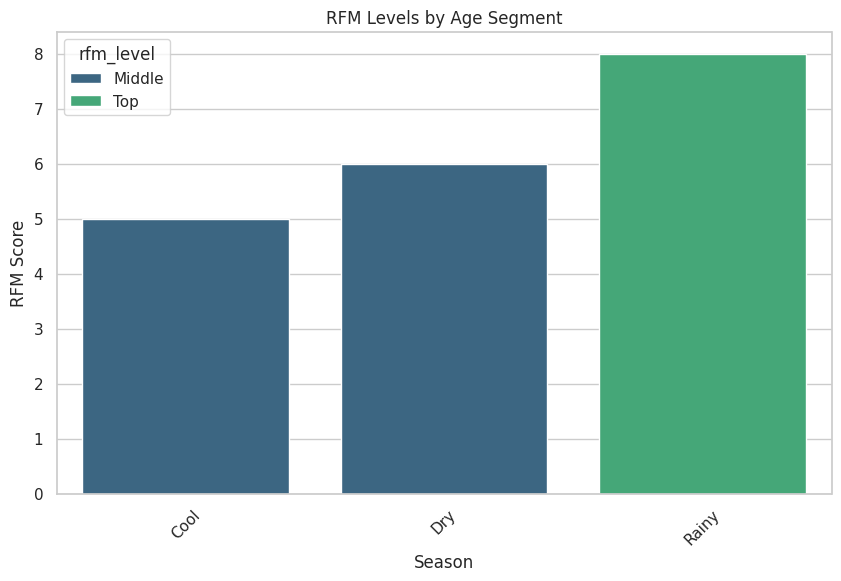

In [150]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for RFM levels
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='rfm_score', hue='rfm_level', data=rfm_df_sorted, palette="viridis")

# Set the title and labels
plt.title('RFM Levels by Age Segment')
plt.xlabel('Season')
plt.ylabel('RFM Score')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Now you have an RFM score to each of your customers, which you can use for targeted strategies

<ipython-input-152-437d169c0b79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='recency_score', data=rfm_df_sorted, ax=axes[0], palette="viridis")
<ipython-input-152-437d169c0b79>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-152-437d169c0b79>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='frequency_score', data=rfm_df_sorted, ax=axes[1], palette="viridis")
<ipython-input-152-437d169c0b79>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
<ipython-in

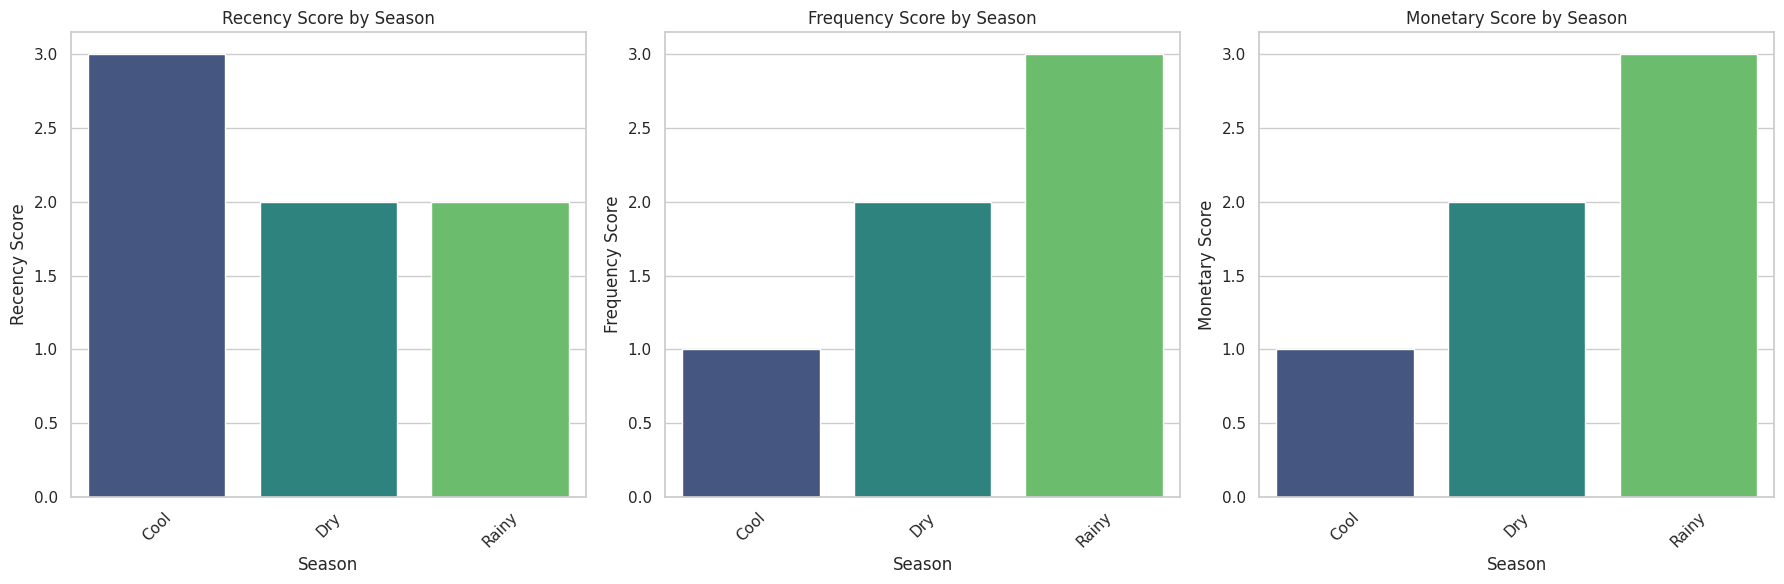

In [152]:
#Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency Score
sns.barplot(x='season', y='recency_score', data=rfm_df_sorted, ax=axes[0], palette="viridis")
axes[0].set_title('Recency Score by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Recency Score')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot Frequency Score
sns.barplot(x='season', y='frequency_score', data=rfm_df_sorted, ax=axes[1], palette="viridis")
axes[1].set_title('Frequency Score by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Frequency Score')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Plot Monetary Score
sns.barplot(x='season', y='monetary_score', data=rfm_df_sorted, ax=axes[2], palette="viridis")
axes[2].set_title('Monetary Score by Season')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Monetary Score')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
group by time of day, category , account number
age & category

1. morning - shopping
2. afternoon - shopping
3. evening - shopping